# Tarea 3 - Computación Cienctífica y Ciencia de los Datos
## Fluctuaciones en el precio de las acciones de Microsoft
### Vicente Mieres / 21.082.122-8

In [2]:
# imports

import pandas as pd
import matplotlib.pyplot as plt

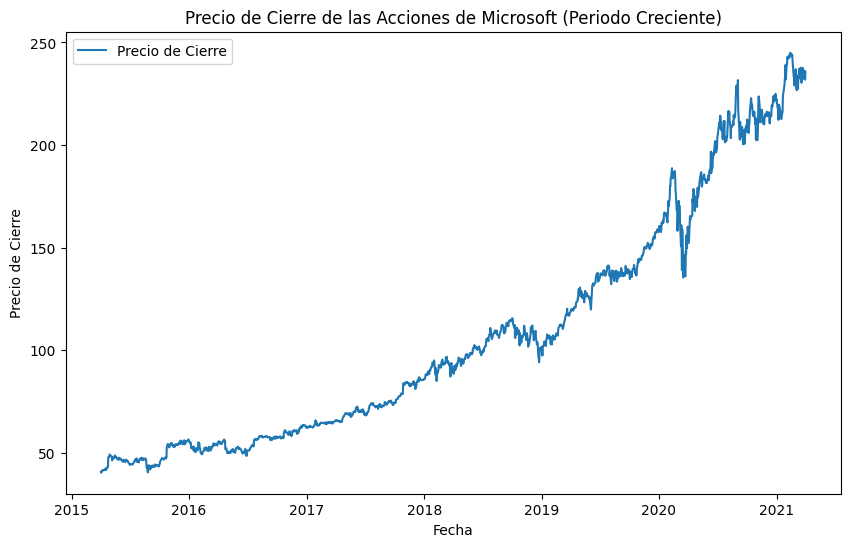

In [6]:
# Carga de datos

data = pd.read_csv('microsoft_stock.csv', parse_dates=['Date'])
data = data[data['Date'] >= '2015-01-01']  # Ajusta las fechas según el periodo creciente

# Graficar el precio de cierre
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Close'], label='Precio de Cierre')
plt.title('Precio de Cierre de las Acciones de Microsoft (Periodo Creciente)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()

In [ ]:
import pymc3 as pm
import numpy as np

# Extraer fechas y precios
dates = data['Date'].map(pd.Timestamp.toordinal).values  # Convertir fechas a enteros
prices = data['Close'].values

# Definir el modelo bayesiano en PyMC
with pm.Model() as model:
    # Definir distribuciones a priori para los parámetros de la recta
    alpha = pm.Normal('alpha', mu=0, sd=10)  # Intercepto
    beta = pm.Normal('beta', mu=0, sd=10)  # Pendiente
    sigma = pm.HalfNormal('sigma', sd=1)  # Desviación estándar de los residuos

    # Definir el modelo lineal
    y_obs = pm.Normal('y_obs', mu=alpha + beta * dates, sd=sigma, observed=prices)

    # Realizar la inferencia utilizando el algoritmo NUTS (No-U-Turn Sampler)
    trace = pm.sample(1000, return_inferencedata=False)

# Graficar los resultados de la inferencia
pm.traceplot(trace)
plt.show()


AttributeError: 'numpy.ufunc' object has no attribute '__module__'